In [2]:
import litstudy

In [3]:
import pybliometrics

pybliometrics.scopus.init()

In [4]:
rea_scopus = litstudy.search_scopus("\"reggio emilia approach\"")

100%|██████████| 1653/1653 [00:01<00:00, 969.11it/s] 


In [8]:
type(rea_scopus)

litstudy.types.DocumentSet

In [36]:
a = rea_scopus.docs[1]
b = a.affiliations
type(b[0])

c=b[0]
d = c.country
d

str(c)[1:-1]

'Texas A&M University-San Antonio'

In [30]:
for o in rea_scopus.docs[0:10]:
    
        print(o.affiliations)
    except Exception as e:
        print(e)

[<University of Malta>]
[<Texas A&M University-San Antonio>, <Reagan High School-San Antonio>, <Bahçeşehir University>]
[<Faculty of Medicine and Medical Sciences, University of Balamand>, <Faculty of Architecture and Design, Azm University>, <Department of Biology, Faculty of Sciences 3, Lebanese University>, <Laboratory of Applied Biotechnology (LBA3B), Azm Center for Research in Biotechnology and Its Applications, EDST, Lebanese University>, <College of Engineering and Technology, American University of the Middle East>, <CNRS, INP, Institut Neurophysiopathol, Aix-Marseille Université>]
[<South College>, <Florida Atlantic University>]
[<Daemen University>]
[<School of Education Science, Nanjing Normal University>]
[<College of Teachers, Chengdu University>, <Children's Friendly City Construction Research Institute of Chengdu, Chengdu University>, <College of Public Administration, Sichuan University>]
[<Department of Education, Manukau Institute of Technology//Te Pūkenga>, <Learning

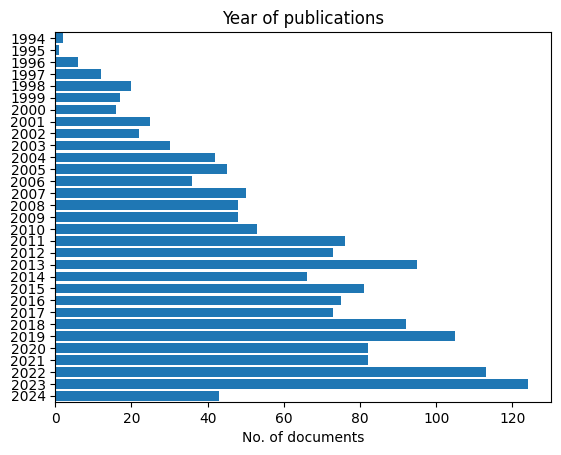

In [5]:
litstudy.plot_year_histogram(rea_scopus);

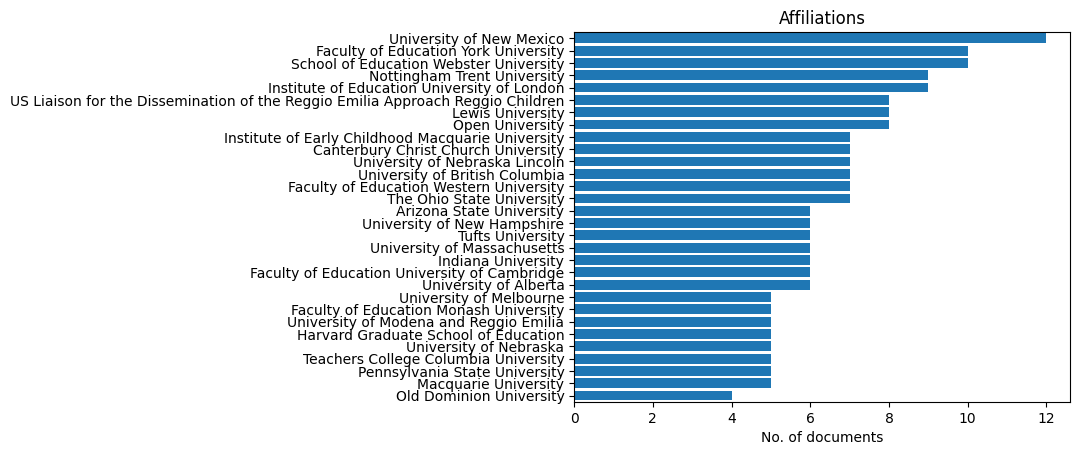

In [5]:
litstudy.plot_affiliation_histogram(rea_scopus, limit=30);

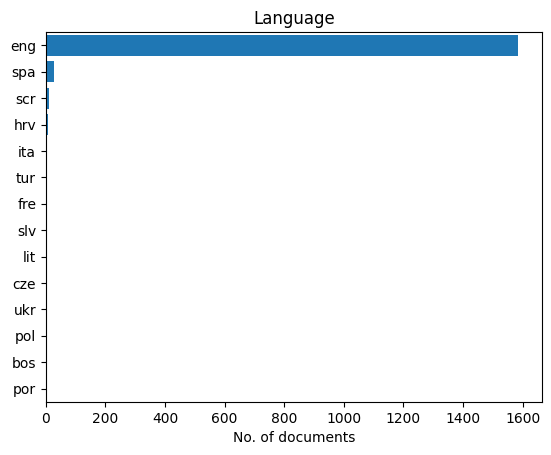

In [6]:
litstudy.plot_language_histogram(rea_scopus);

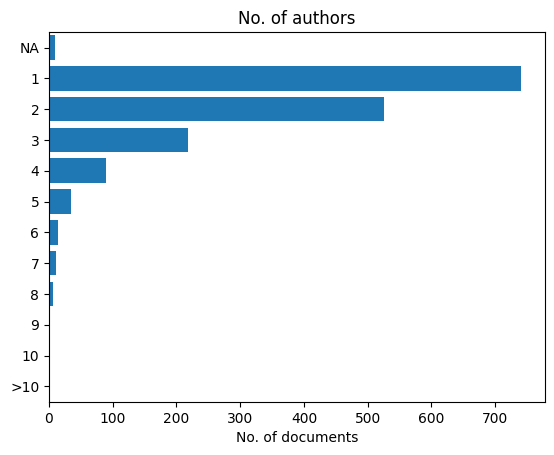

In [7]:
litstudy.plot_number_authors_histogram(rea_scopus);

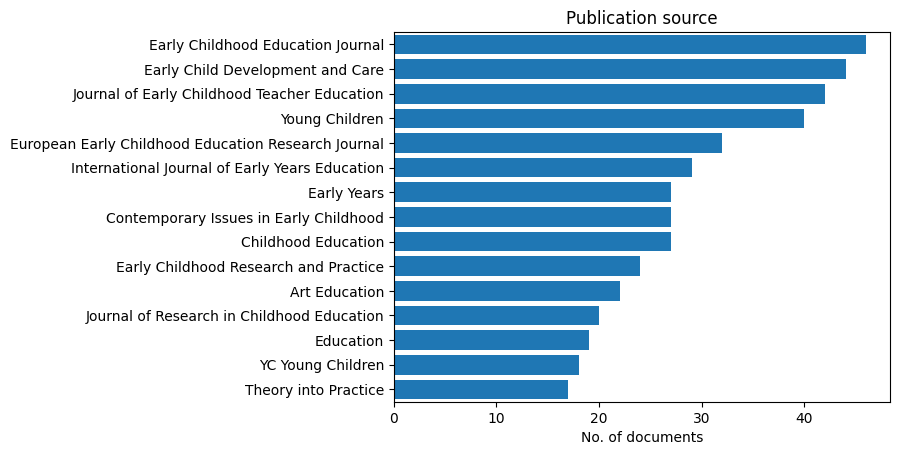

In [8]:
litstudy.plot_source_histogram(rea_scopus, limit=15);

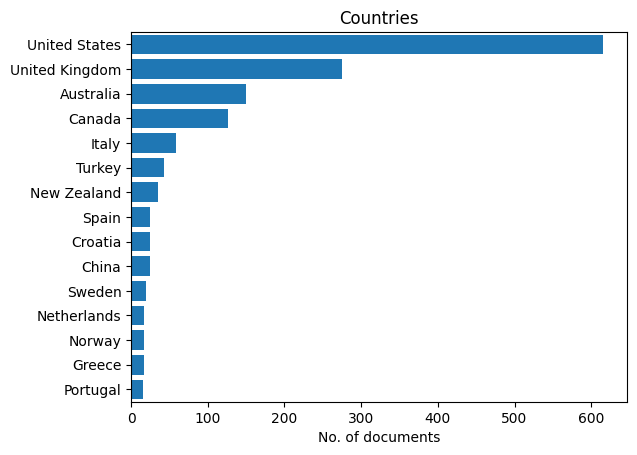

In [5]:
litstudy.plot_country_histogram(rea_scopus, limit=15);

In [6]:
import custom_litstudy
histogram = custom_litstudy.compute_country_histogram(rea_scopus, normalize=True)

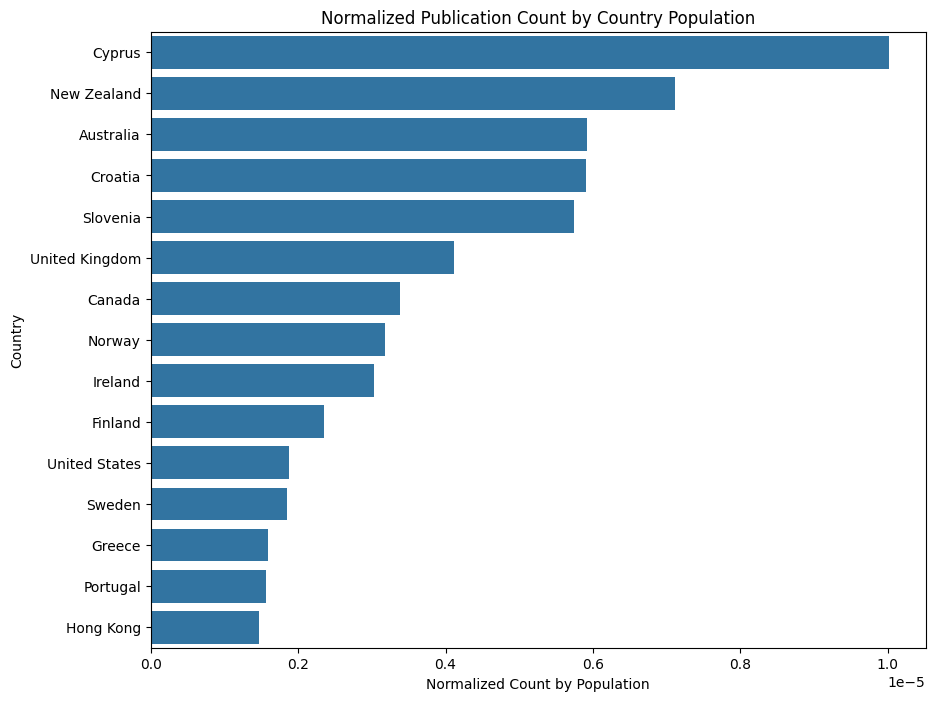

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'Country' column is of type string (if not already)

histogram['Country'] = histogram['Country'].astype(str)

histogram_cut = histogram.loc[(histogram['Count']>=10)].head(15)

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='NormalizedCount', y='Country', data=histogram_cut)

# Add labels and title
plt.xlabel('Normalized Count by Population')
plt.ylabel('Country')
plt.title('Normalized Publication Count by Country Population')

# Show the plot
plt.show()

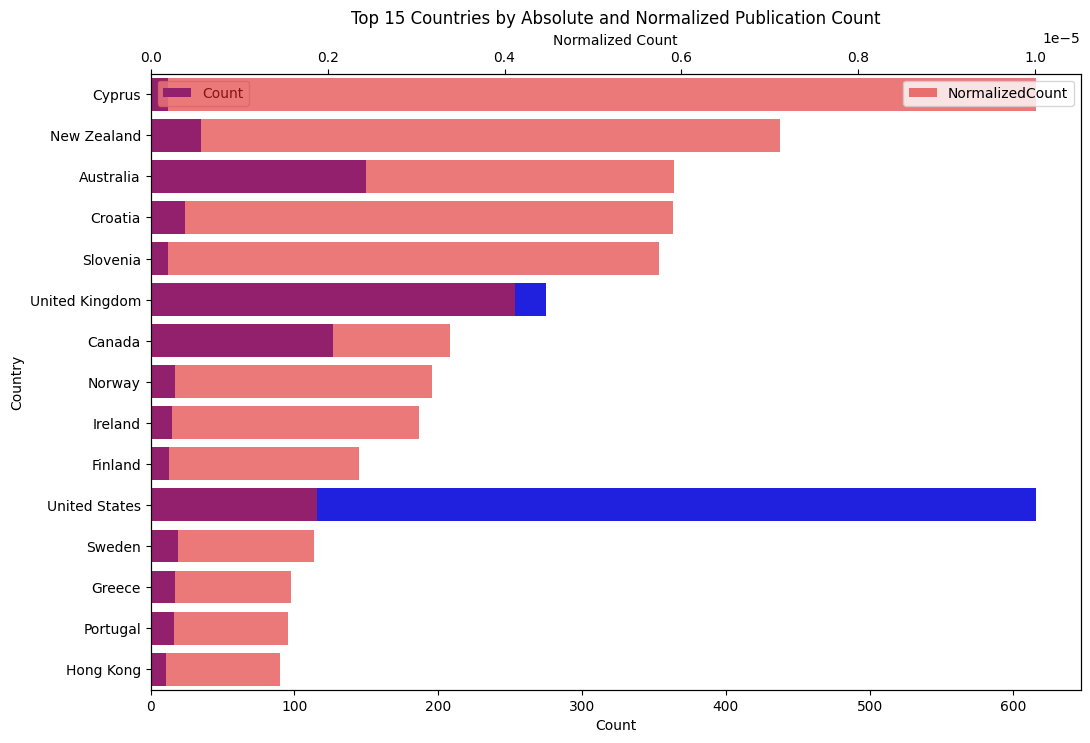

In [14]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot absolute counts
sns.barplot(x='Count', y='Country', data=histogram_cut, ax=ax1, color='b', label='Count')
ax1.set_xlabel('Count')
ax1.set_ylabel('Country')
ax1.set_title('Top 15 Countries by Absolute and Normalized Publication Count')

# Create a second y-axis to plot the normalized counts
ax2 = ax1.twiny()
sns.barplot(x='NormalizedCount', y='Country', data=histogram_cut, ax=ax2, color='r', label='NormalizedCount', alpha=0.6)
ax2.set_xlabel('Normalized Count')

# Combine the legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


In [52]:
litstudy.plot_cocitation_network(rea_scopus, max_edges=500)

citation.html


In [37]:
corpus = litstudy.build_corpus(rea_scopus, ngram_threshold=0.8)

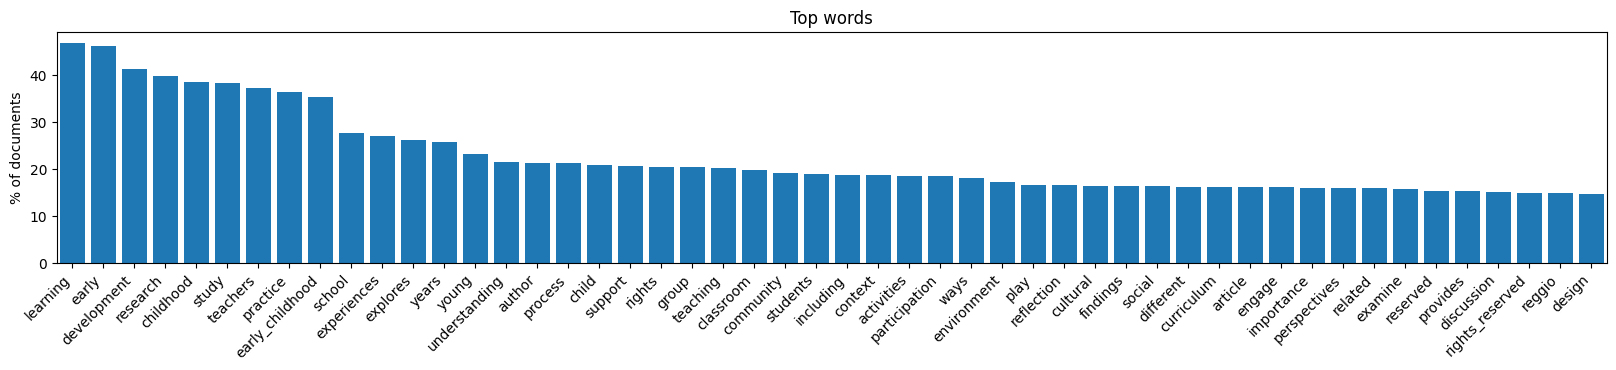

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=50, title="Top words", vertical=True, label_rotation=45);

In [38]:
num_topics = 15
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)

/Users/ariannabienati/git/litstudy/myenv/lib/python3.12/site-packages/gensim/models/nmf.py:578: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/Users/ariannabienati/git/litstudy/myenv/lib/python3.12/site-packages/gensim/models/nmf.py:607: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/Users/ariannabienati/git/litstudy/myenv/lib/python3.12/site-packages/gensim/models/nmf.py:620: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


In [45]:
type(topic_model)

topic_model.doc2topic.shape
topic_model.document_topics(1)

array([0.03614893, 0.        , 0.        , 0.5194553 , 0.        ,
       0.21118607, 0.20749488, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0210588 , 0.        , 0.        ],
      dtype=float32)

In [44]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['language', 'multilingual', 'families', 'english', 'parents']
Topic 2: ['documentation', 'pedagogical', 'teachers', 'visible', 'professional']
Topic 3: ['music', 'activities', 'listening', 'motivation', 'rea']
Topic 4: ['care', 'teachers', 'child', 'professional', 'quality']
Topic 5: ['curriculum', 'creative', 'project', 'emergent', 'implementation']
Topic 6: ['preschool', 'design', 'listening', 'social', 'quality']
Topic 7: ['environment', 'teaching', 'classroom', 'science', 'students']
Topic 8: ['play', 'construction', 'activities', 'role', 'risky']
Topic 9: ['art', 'visual', 'integrated', 'artists', 'museum']
Topic 10: ['drawing', 'young', 'research', 'making', 'kindergarten']
Topic 11: ['literacy', 'multimodal', 'digital', 'cultural', 'pedagogy']
Topic 12: ['inclusive', 'disabilities', 'community', 'special', 'settings']
Topic 13: ['assessment', 'mathematics', 'years', 'book', 'practitioners']
Topic 14: ['childhood', 'early_childhood', 'early', 'social', 'theory']
Topic 1

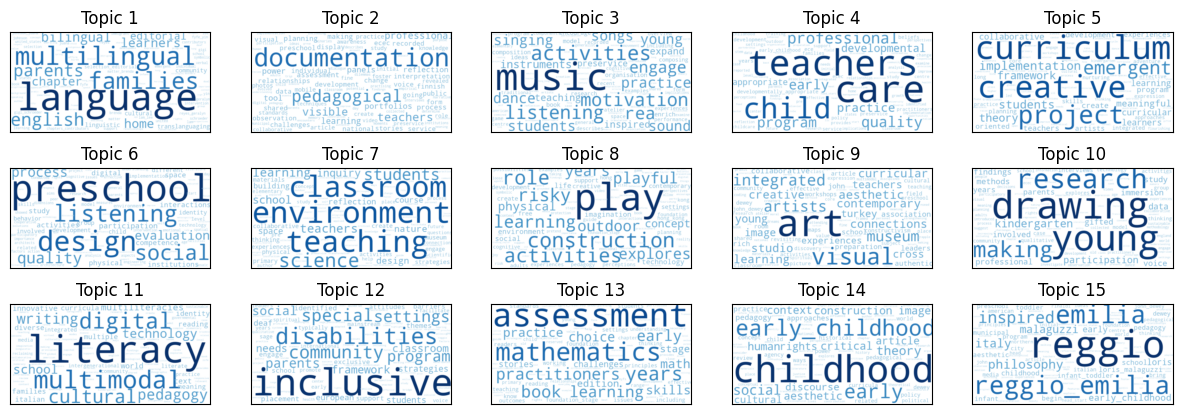

In [45]:
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);

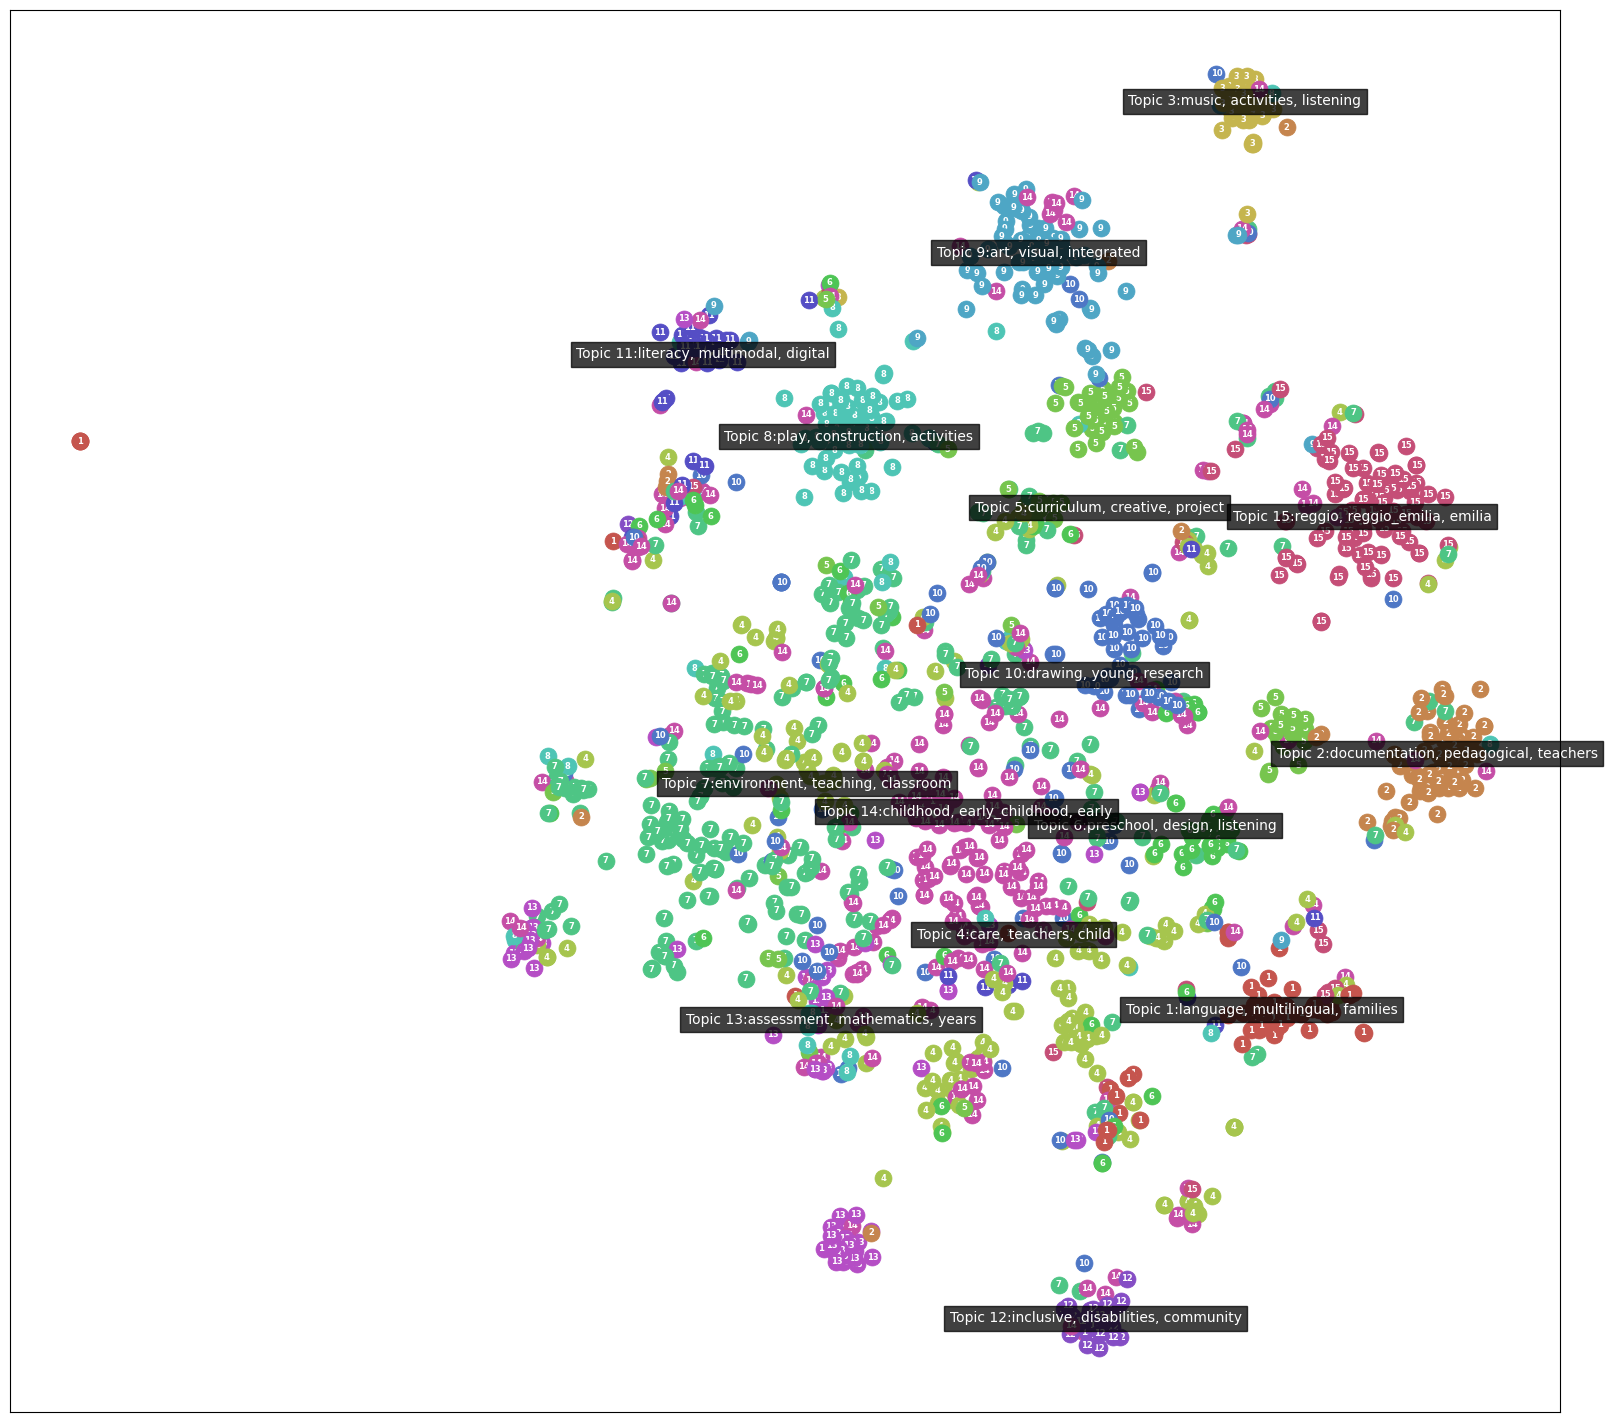

In [46]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);

In [51]:
topic_id = topic_model.best_topic_for_token('community')

In [52]:
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=15):
    print(rea_scopus[int(doc_id)].title)

The inclusive community
International preschool inclusion: Bridging the gap between vision and practices
The project approach: A strategy for inclusive classrooms
Creativity for engagement and inclusion
Practising social inclusion
Inclusion: A principled guide for school leaders
Hidden voices: Parents' perspectives on the barriers to and facilitators of inclusion on their preschool children with disabilities
The early years setting - an inclusive framework
Communicating with deaf students in inclusive schools: Insights from saudi university faculty*
Perspectives on inclusion of students who are deaf or hard-of-hearing in Armenia
Least Restrictive and Natural Environments for Young Children With Disabilities: A Legal Analysis of Issues
An adapted ecosystem model for inclusive early childhood education: a qualitative cross European study
Rights, inclusion and citizenship: a good news story about learning in the early years
Childrens spirituality and inclusion: Strengthening a childs spir

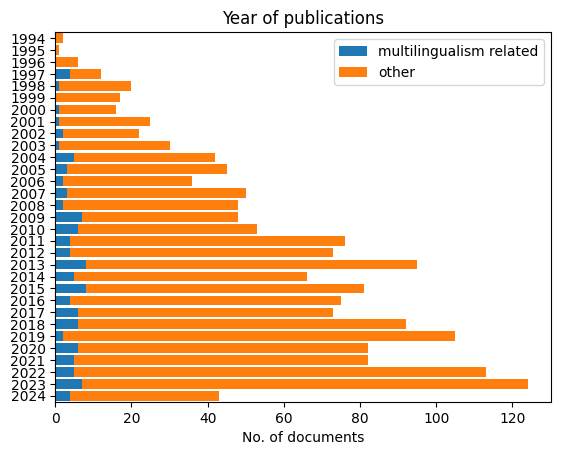

In [55]:
threshold = 0.2
ml_topic = topic_model.doc2topic[:, topic_id] > threshold

docs = rea_scopus.add_property('ml_topic', ml_topic)


groups = {
    'multilingualism related': 'ml_topic',
    'other': 'not ml_topic',
}

litstudy.plot_year_histogram(docs, groups=groups, stacked=True);

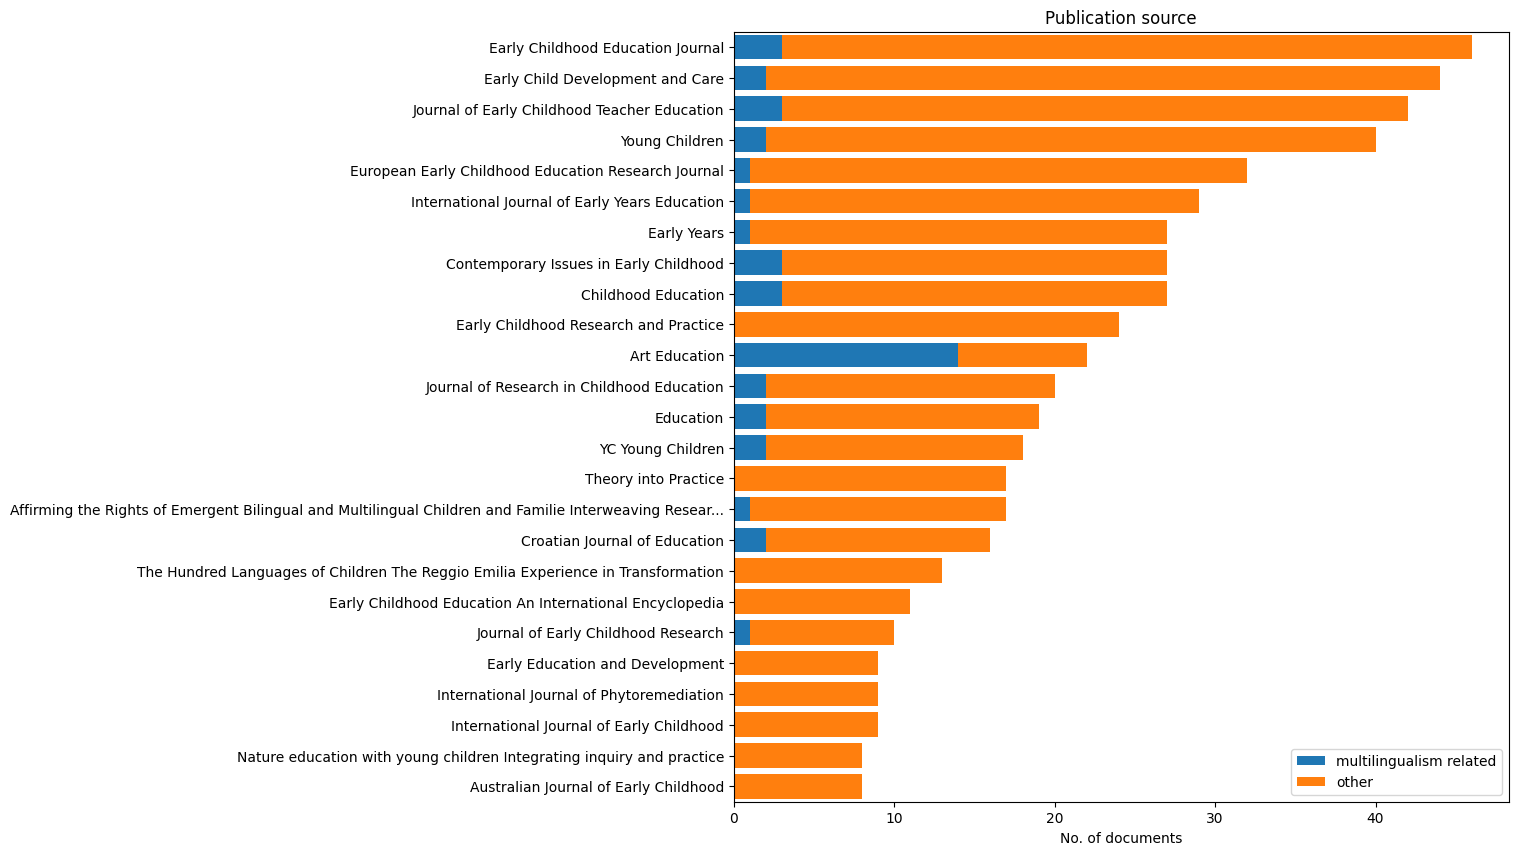

In [56]:
plt.figure(figsize=(10, 10))
litstudy.plot_source_histogram(docs, groups=groups, limit=25, stacked=True);